# Modeling with Naive Bayes

#### We build multiple Naive Bayes Models to Train on cleaned text and variables: 
#### Relevancy_score (highly relevant (4), very relevant (3), relevant (2), minimally relevant (1), not relevant (0))
#### Treatment_Number (user receives treatment (1), user does not receive treatment (0))
#### Recommendation_Score (user recommends treatment (1), user does not recommend treatment (0))

In [1]:
#import the necessary library, modules, functions, settings 
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns

In [2]:
#load in the csv file containing the sentiment validation set as a data frame 
data_df = pd.read_csv("EvaluatedValidatedSentimentData.csv")

In [3]:
#import the necessary library, modules, functions, settings 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import SMOTE

In [4]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=60, test_size=0.2,stratify=y1)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [5]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [6]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [7]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.7721518987341772

Classification Report:
               precision    recall  f1-score   support

           2       0.82      0.93      0.88        60
           3       0.45      0.29      0.36        17
           4       0.00      0.00      0.00         2

    accuracy                           0.77        79
   macro avg       0.43      0.41      0.41        79
weighted avg       0.72      0.77      0.74        79



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

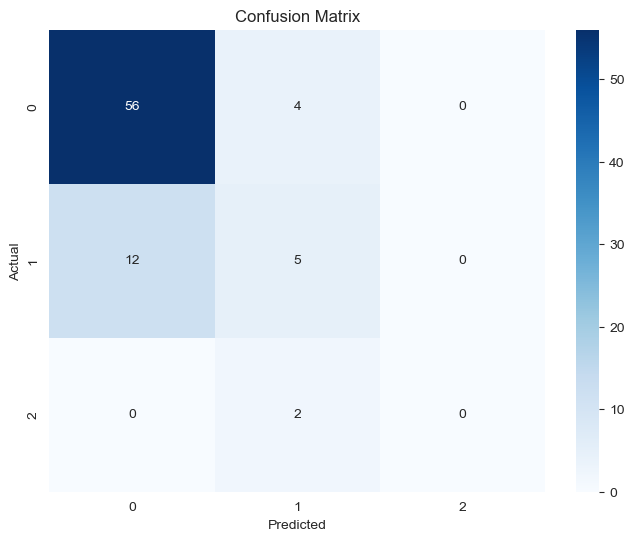

In [8]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=200, test_size=0.2, stratify=y2)
X_train_vect = vectorizer1.fit_transform(X_train)

In [14]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_vect, y2_train)

MultinomialNB()

In [15]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [16]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        79

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


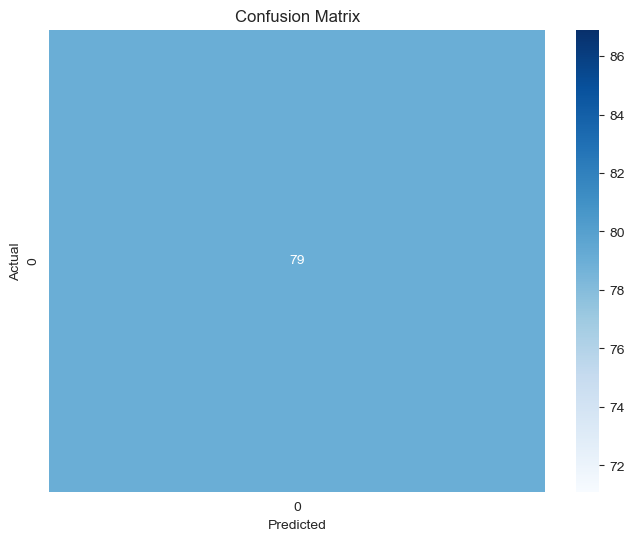

In [17]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=300, test_size=0.2,stratify=y3)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [24]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [25]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [26]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.6455696202531646

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        52
           1       0.48      0.37      0.42        27

    accuracy                           0.65        79
   macro avg       0.59      0.58      0.58        79
weighted avg       0.63      0.65      0.63        79



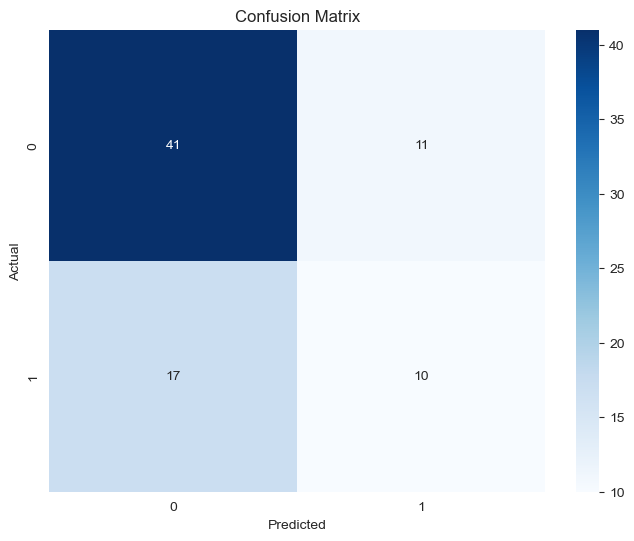

In [27]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=400, test_size=0.2,stratify=y1)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [30]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [31]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [32]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.45569620253164556

Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.37      0.54        60
           3       0.27      0.82      0.41        17
           4       0.00      0.00      0.00         2

    accuracy                           0.46        79
   macro avg       0.42      0.40      0.32        79
weighted avg       0.82      0.46      0.50        79



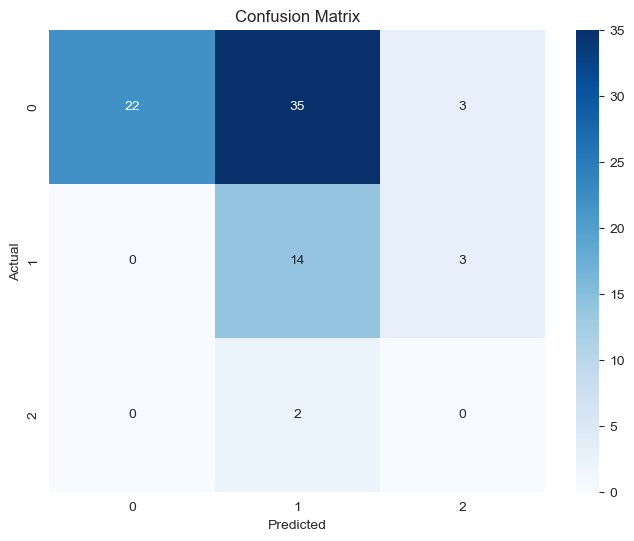

In [33]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=500, test_size=0.2, stratify=y2)
X_train_vect = vectorizer2.fit_transform(X_train)

In [35]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_vect, y2_train)

MultinomialNB()

In [36]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [37]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        79

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


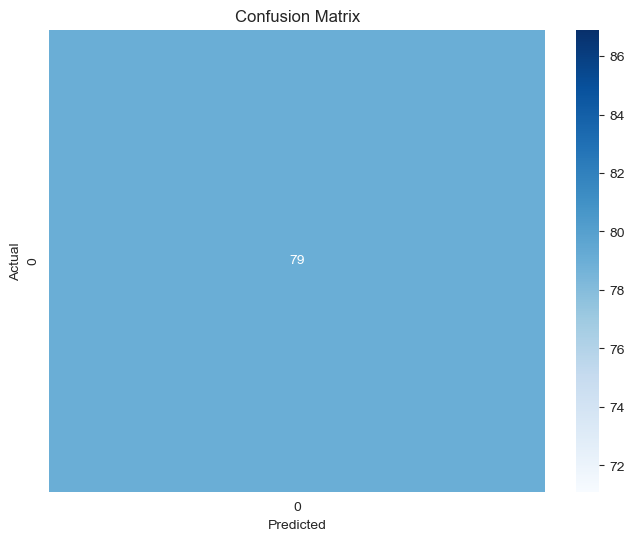

In [38]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=600, test_size=0.2,stratify=y3)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [40]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [41]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [42]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.5063291139240507

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.38      0.51        52
           1       0.38      0.74      0.51        27

    accuracy                           0.51        79
   macro avg       0.56      0.56      0.51        79
weighted avg       0.62      0.51      0.51        79



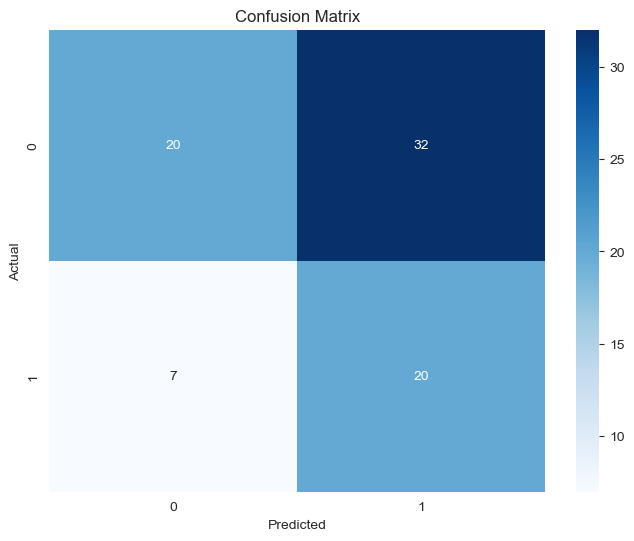

In [43]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()